# Computer Vision Project - Rookie OCR

### Importing Common Libraries or Modules

In [1]:
from src.image_processor.filters import *
from src.image_processor.morphops import *
from src.image_processor.segmentation import *
from src.image_processor.thresholding import *
from src.utils import *

import cv2
import numpy as np

### Importing Common Input Image

In [2]:
PATH = "./assets/moon.png"

In [3]:
image = cv2.imread(PATH, cv2.IMREAD_GRAYSCALE)

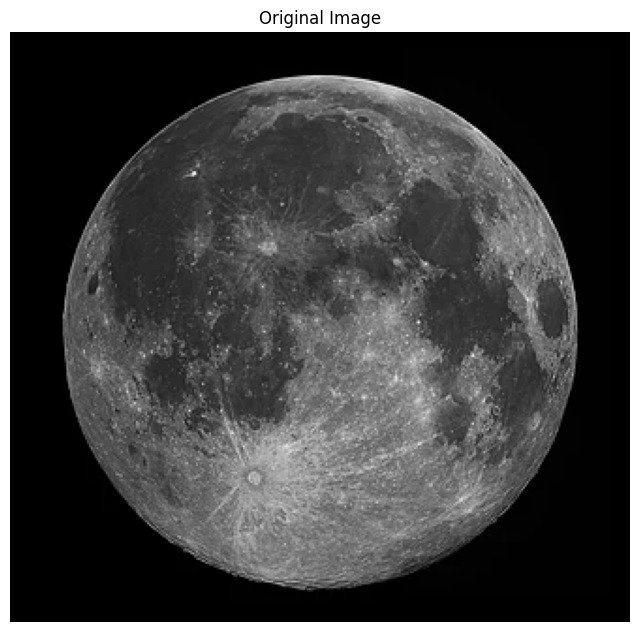

In [4]:
Plotter.PlotImage(image, title="Original Image")

### 1. Filters

In [5]:
filters_metadata = {
    FilterType.AVERAGE: (
        [
            {"kernel_size": 5},
            {"kernel_size": 11},
            {"kernel_size": 25},
        ],
        [
            "Kernel Size = 5",
            "Kernel Size = 11",
            "Kernel Size = 25",
        ],
    ),
    FilterType.MEDIAN: (
        [
            {"kernel_size": 5},
            {"kernel_size": 11},
            {"kernel_size": 25},
        ],
        [
            "Kernel Size = 5",
            "Kernel Size = 11",
            "Kernel Size = 25",
        ],
    ),
    FilterType.GAUSSIAN: (
        [
            {"kernel_size": 5, "sigma": 1},
            {"kernel_size": 7, "sigma": 2},
            {"kernel_size": 11, "sigma": 3},
        ],
        [
            "Kernel Size = 5, Sigma = 1",
            "Kernel Size = 7, Sigma = 2",
            "Kernel Size = 11, Sigma = 3",
        ],
    ),
    FilterType.SOBEL: (
        [
            {"axis": 0},
            {"axis": 1},
        ],
        [
            "Axis = 0 (Sx)",
            "Axis = 1 (Sy)",
        ],
    ),
    FilterType.LAPLACIAN: (
        [
            {},
        ],
        [
            "No Additional Parameters",
        ],
    ),
    FilterType.UNSHARP_MASKING: (
        [
            {"sigma": 1, "strength": 1},
            {"sigma": 2, "strength": 2},
            {"sigma": 3, "strength": 3},
        ],
        [
            "Sigma = 1, Strength = 1",
            "Sigma = 2, Strength = 2",
            "Sigma = 3, Strength = 3",
        ],
    ),    
    FilterType.HIGH_BOOST: (
        [
            {"sigma": 1, "A": 1},
            {"sigma": 2, "A": 2},
            {"sigma": 3, "A": 3},
        ],
        [
            "Sigma = 1, A = 1",
            "Sigma = 2, A = 2",
            "Sigma = 3, A = 3", 
        ]
    )
}

##### 1.1. Average Filter

In [6]:
average_filter_params, average_filter_titles = filters_metadata[FilterType.AVERAGE]

average_filter_images = []
for kwargs in average_filter_params:
    flt = AverageFilter(**kwargs)
    average_filter_images.append(flt.Filter(image))

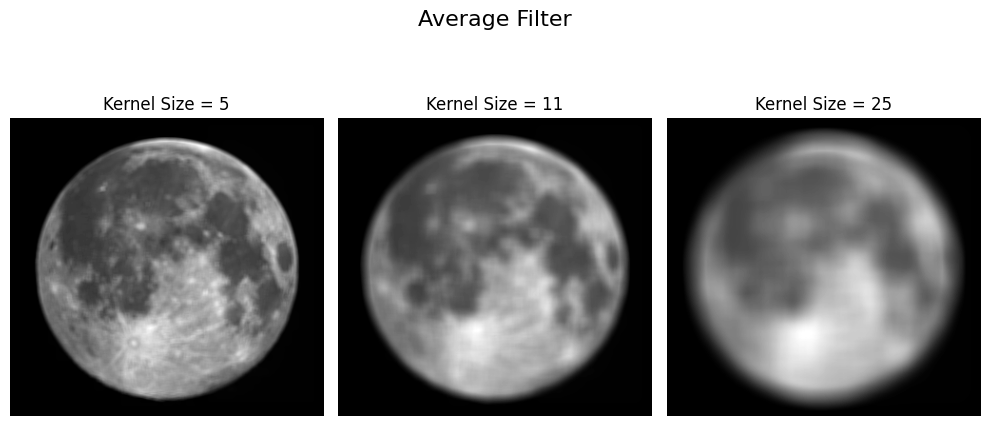

In [7]:
Plotter.PlotImages(
    average_filter_images,
    title="Average Filter",
    subtitles=average_filter_titles,
)

##### 1.2. Median Filter

In [8]:
median_filter_params, median_filter_titles = filters_metadata[FilterType.MEDIAN]

median_filter_images = []
for kwargs in median_filter_params:
    flt = MedianFilter(**kwargs)
    median_filter_images.append(flt.Filter(image))

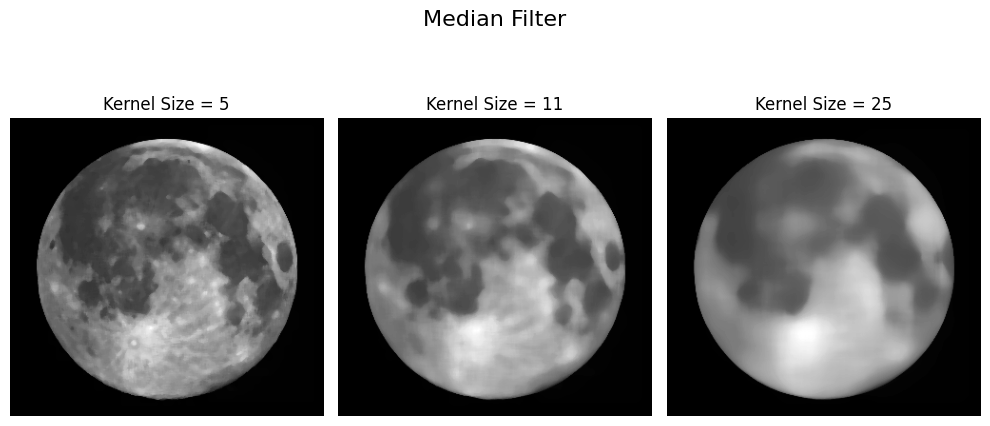

In [9]:
Plotter.PlotImages(
    median_filter_images,
    title="Median Filter",
    subtitles=median_filter_titles,
)

##### 1.3. Gaussian Filter

In [10]:
gaussian_filter_params, gaussian_filter_titles = filters_metadata[FilterType.GAUSSIAN]

gaussian_filter_images = []
for kwargs in gaussian_filter_params:
    flt = GaussianFilter(**kwargs)
    gaussian_filter_images.append(flt.Filter(image))

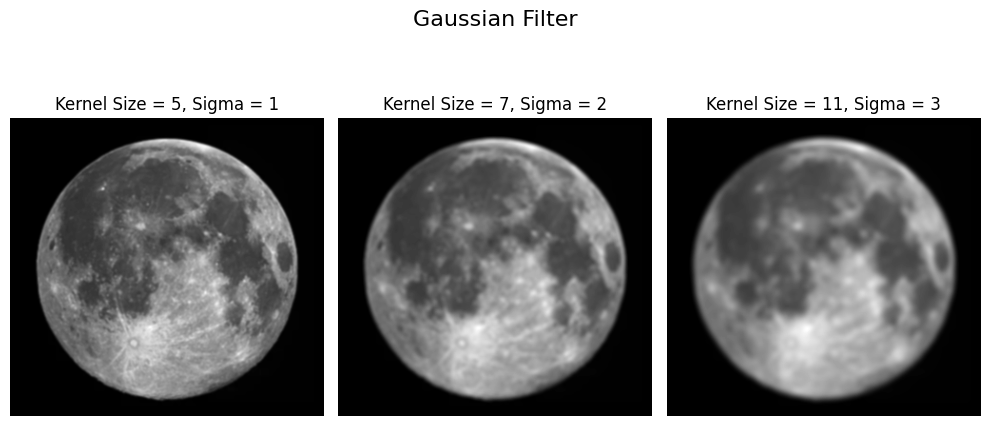

In [11]:
Plotter.PlotImages(
    gaussian_filter_images, 
    title="Gaussian Filter", 
    subtitles=gaussian_filter_titles,
)

##### 1.4. Sobel Filter

In [12]:
sobel_filter_params, sobel_filter_titles = filters_metadata[FilterType.SOBEL]

sobel_filter_images = []
for kwargs in sobel_filter_params:
    flt = SobelFilter(**kwargs)
    sobel_filter_images.append(flt.Filter(image))

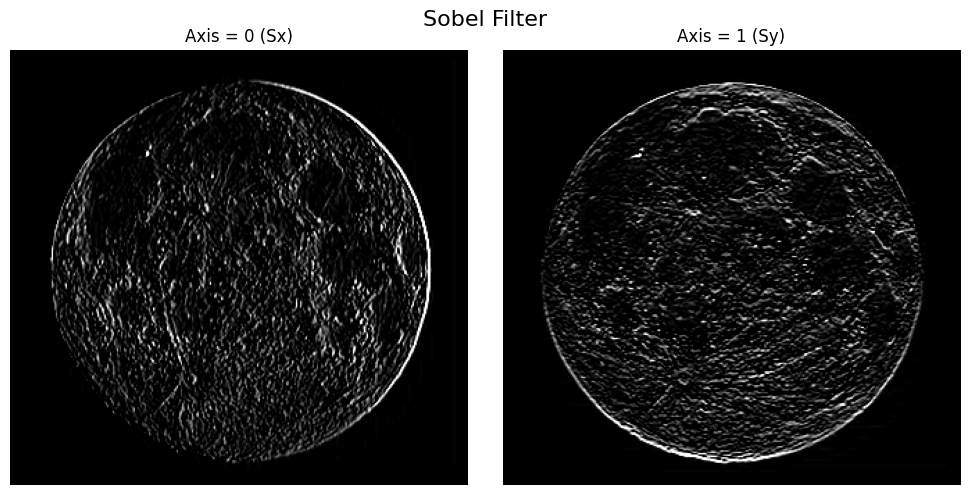

In [13]:
Plotter.PlotImages(
    sobel_filter_images,
    title="Sobel Filter",
    subtitles=sobel_filter_titles,
)

##### 1.5. LaPlacian Filter

In [14]:
laplacian_filter_params, laplacian_filter_titles = filters_metadata[FilterType.LAPLACIAN]

laplacian_filter_images = []
for kwargs in laplacian_filter_params:
    flt = LaplacianFilter(**kwargs)
    laplacian_filter_images.append(flt.Filter(image))

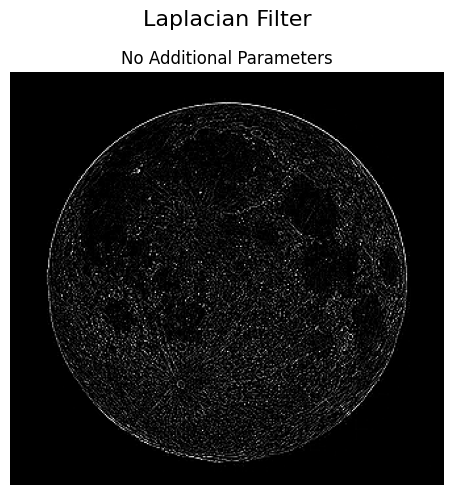

In [15]:
Plotter.PlotImages(
    laplacian_filter_images,
    title="Laplacian Filter",
    subtitles=laplacian_filter_titles
)

##### 1.6. Unsharp Masking (USM) Filter

In [16]:
usm_filter_params, usm_filter_titles = filters_metadata[FilterType.UNSHARP_MASKING]

usm_filter_images = []
for kwargs in usm_filter_params:
    flt = UnsharpMaskingFilter(**kwargs)
    usm_filter_images.append(flt.Filter(image))

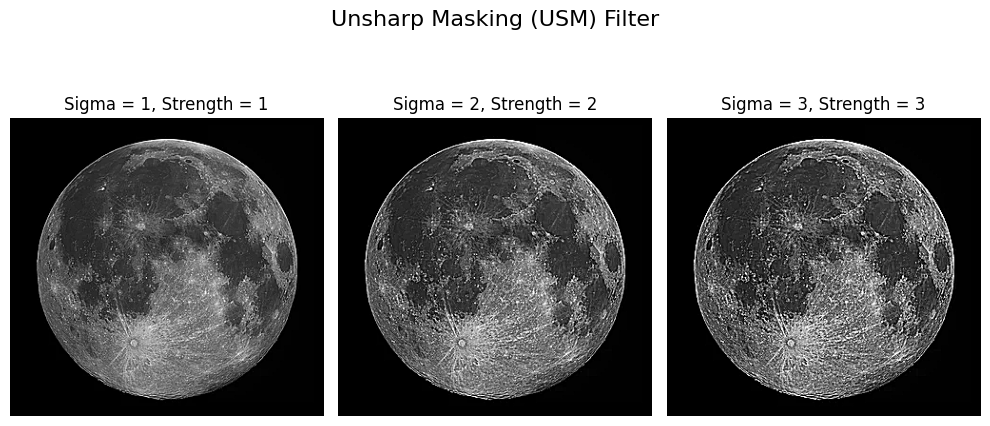

In [17]:
Plotter.PlotImages(
    usm_filter_images,
    title="Unsharp Masking (USM) Filter",
    subtitles=usm_filter_titles,
)

##### 1.7. High-Boost Filter

In [18]:
highboost_filter_params, highboost_filter_titles = filters_metadata[FilterType.HIGH_BOOST]

highboost_filter_images = []
for kwargs in highboost_filter_params:
    flt = HighBoostFilter(**kwargs)
    highboost_filter_images.append(flt.Filter(image))

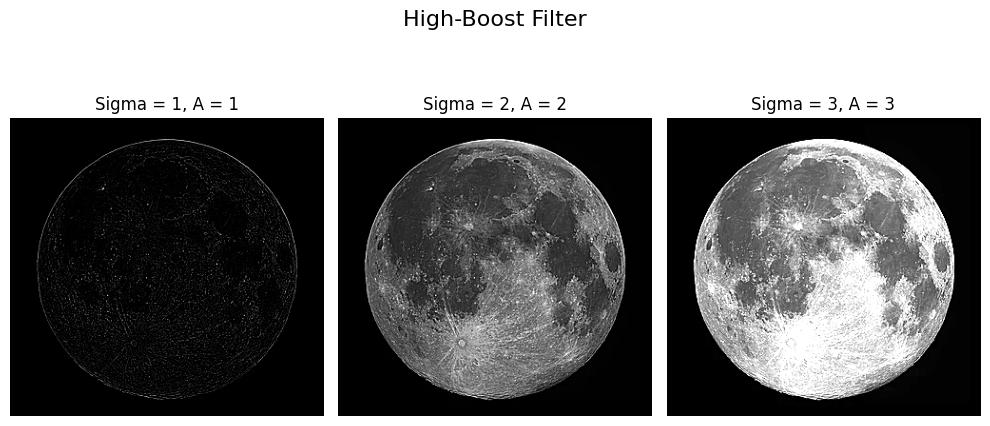

In [19]:
Plotter.PlotImages(
    highboost_filter_images,
    title="High-Boost Filter",
    subtitles=highboost_filter_titles
)

### 2. Thresholding

In [20]:
thresh_modes = [
    ThresholdingMode.BINARY,
    ThresholdingMode.BINARY_INV,
    ThresholdingMode.TRUNC,
    ThresholdingMode.TOZERO,
    ThresholdingMode.TOZERO_INV,
]

thresholding_metadata = {
    ThresholdingType.GLOBAL: (
        [
            {
                "threshold": 127.0,
                "max_value": 255.0,
            },
            {
                "threshold": 96.0,
                "max_value": 200.0,
            },
            {
                "threshold": 64.0,
                "max_value": 156.0,
            },
        ],
        [
            "Threshold = 127, Max Value = 255",
            "Threshold = 96, Max Value = 200",
            "Threshold = 64, Max Value = 156",
        ],
    ),
    ThresholdingType.ADAPTIVE_MEAN: (
        [
            {
                "block_size": 11,
                "C": 3.0,
            },
            {
                "block_size": 9,
                "C": 2.0,
            },
            {
                "block_size": 7,
                "C": 1.0,
            },
        ],
        [
            "Block Size = 11, C = 3",
            "Block Size = 9, C = 2",
            "Block Size = 7, C = 1",
        ],
    ),
    ThresholdingType.ADAPTIVE_GAUSSIAN: (
        [
            {
                "block_size": 11,
                "sigma": 1.0,
                "C": 3.0,
            },
            {
                "block_size": 9,
                "sigma": 2.0,
                "C": 2.0,
            },
            {
                "block_size": 7,
                "sigma": 3.0,
                "C": 1.0,
            },
        ],
        [
            "Block Size = 11, Sigma = 1, C = 3",
            "Block Size = 9, Sigma = 2, C = 2",
            "Block Size = 7, Sigma = 3, C = 1",
        ],
    ),
    ThresholdingType.OTSU: (
        [
            {
                "max_value": 255.0,
            },
            {
                "max_value": 200.0,
            },
            {
                "max_value": 164.0,
            },
        ],
        [
            "Max Value = 255",
            "Max Value = 200",
            "Max Value = 164",
        ]
    )
}

##### 2.1. Global Thresholding

In [21]:
global_thresh_params, global_thresh_titles = thresholding_metadata[ThresholdingType.GLOBAL]

ovr_global_thresh_images = []
for th_mode in thresh_modes:
    global_thresh_images = []
    for kwargs in global_thresh_params:
        global_thresh_images.append(
            GlobalThresholding(th_mode, **kwargs).ApplyThresholding(image)
        )
    ovr_global_thresh_images.append(global_thresh_images)

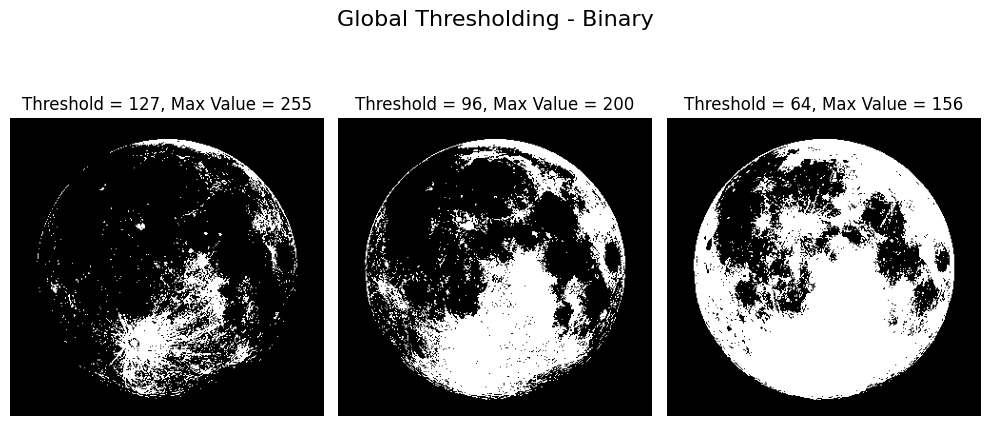

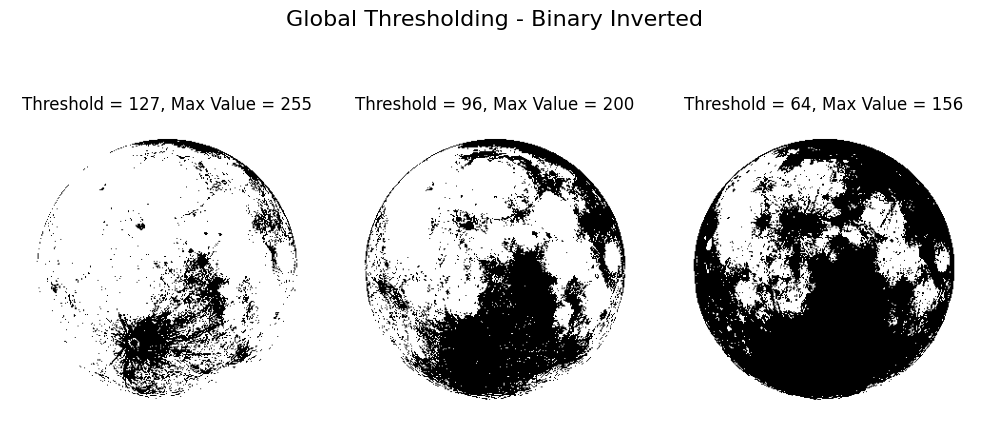

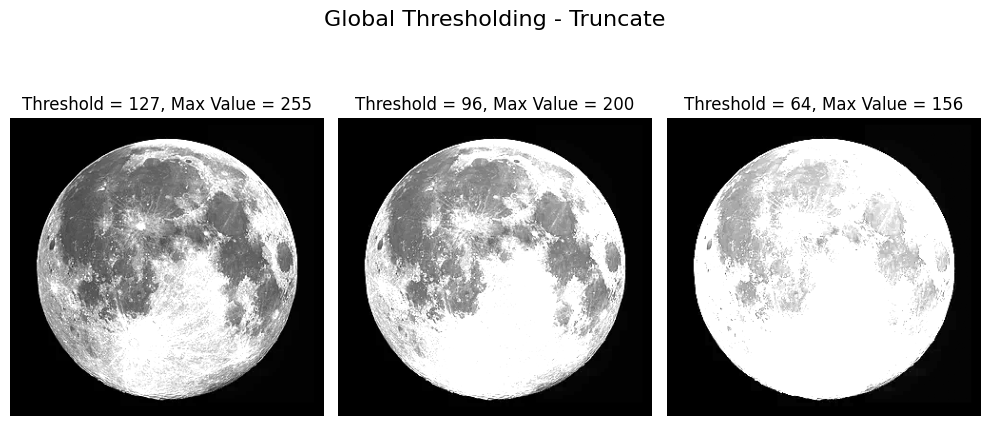

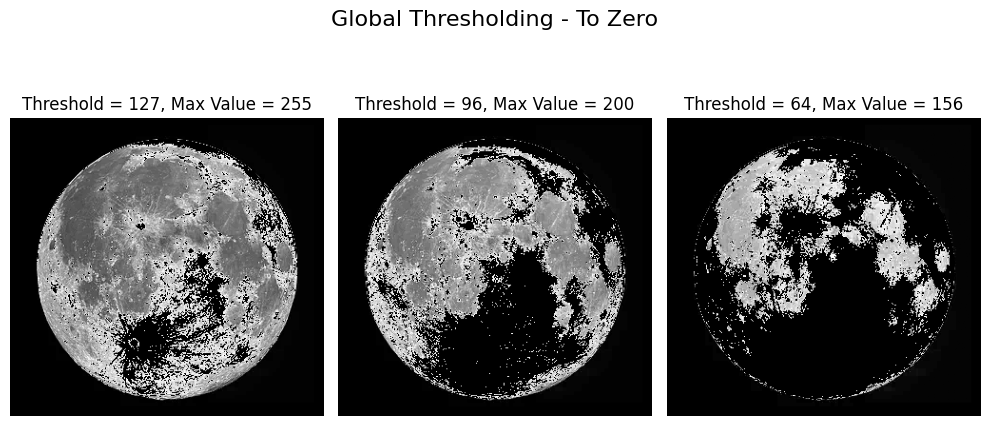

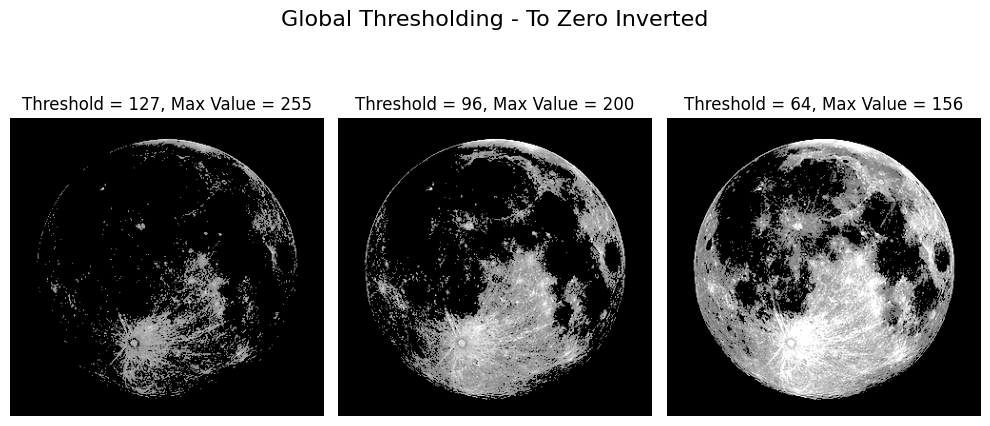

In [22]:
for i, th_mode in enumerate(thresh_modes):
    Plotter.PlotImages(
        ovr_global_thresh_images[i],
        title=f"Global Thresholding - {th_mode.value}",
        subtitles=global_thresh_titles,
    )

##### 2.2. Adaptive Mean Thresholding

In [23]:
ada_mean_thresh_params, ada_mean_thresh_titles = thresholding_metadata[
    ThresholdingType.ADAPTIVE_MEAN
]

ovr_ada_mean_thresh_images = []
for th_mode in thresh_modes:
    ada_mean_thresh_images = []
    for kwargs in ada_mean_thresh_params:
        ada_mean_thresh_images.append(
            AdaptiveMeanThresholding(th_mode, **kwargs).ApplyThresholding(image)
        )
    ovr_ada_mean_thresh_images.append(ada_mean_thresh_images)

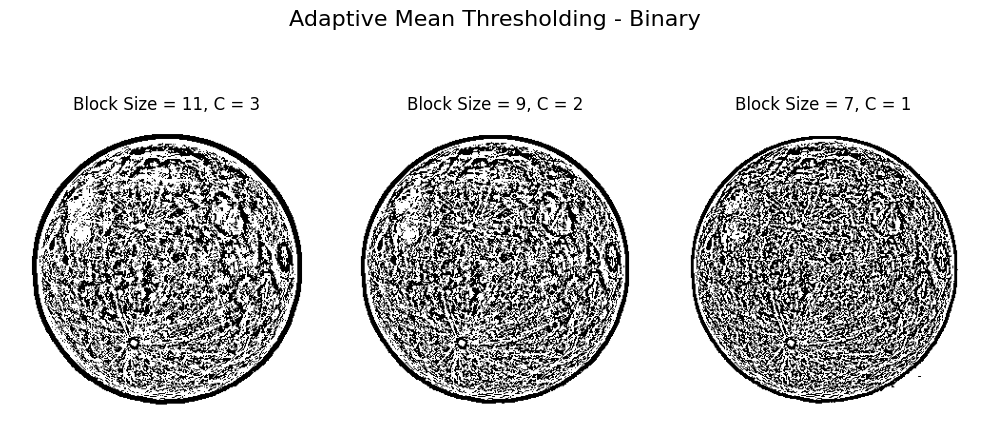

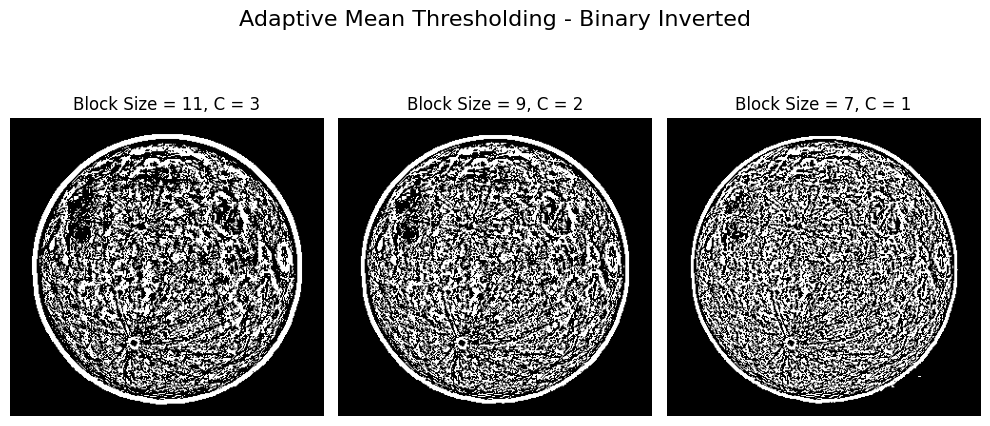

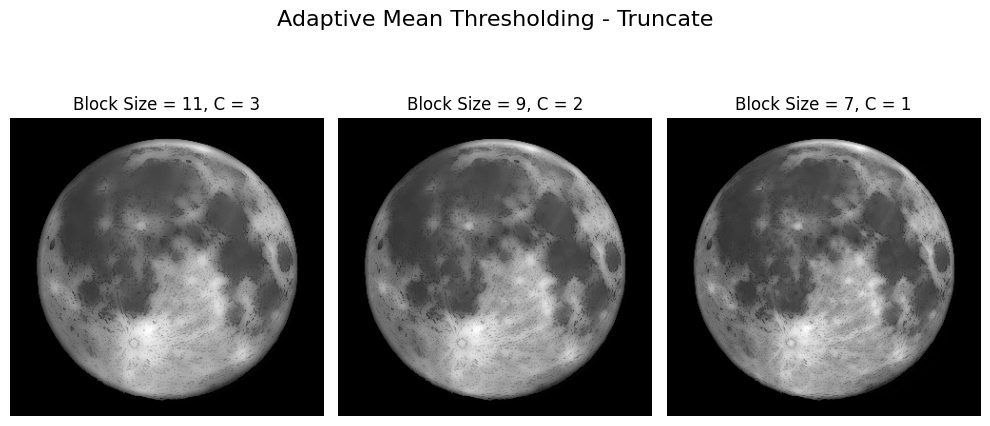

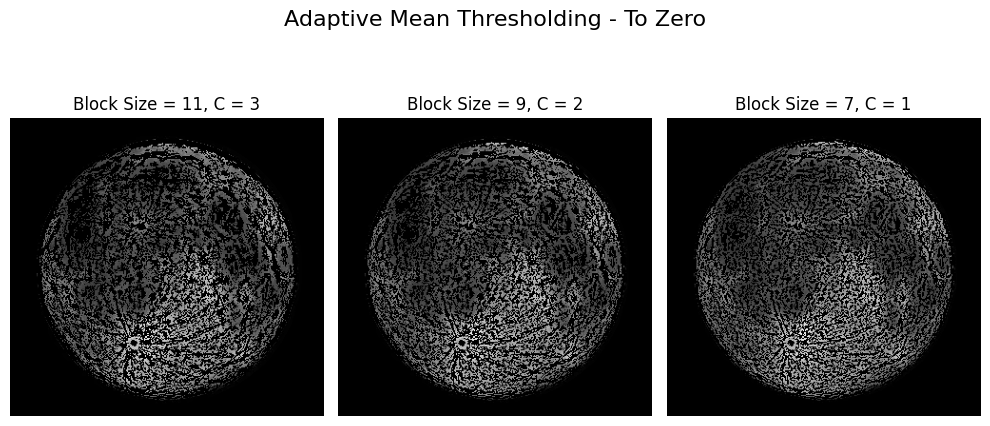

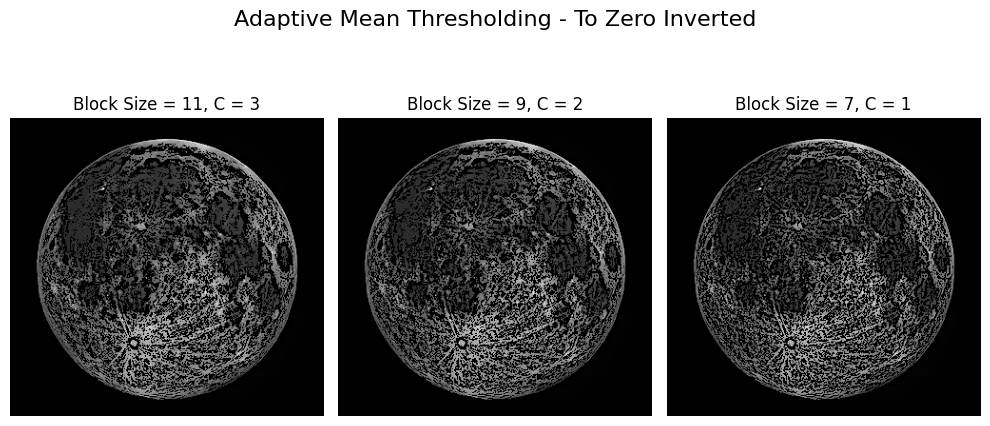

In [24]:
for i, th_mode in enumerate(thresh_modes):
    Plotter.PlotImages(
        ovr_ada_mean_thresh_images[i],
        title=f"Adaptive Mean Thresholding - {th_mode.value}",
        subtitles=ada_mean_thresh_titles,
    )

##### 2.3. Adaptive Gaussian Thresholding

In [25]:
ada_gauss_thresh_params, ada_gauss_thresh_titles = thresholding_metadata[
    ThresholdingType.ADAPTIVE_GAUSSIAN
]

ovr_ada_gauss_thresh_images = []
for th_mode in thresh_modes:
    ada_gauss_thresh_images = []
    for kwargs in ada_gauss_thresh_params:
        ada_gauss_thresh_images.append(
            AdaptiveGaussianThresholding(th_mode, **kwargs).ApplyThresholding(image)
        )
    ovr_ada_gauss_thresh_images.append(ada_gauss_thresh_images)

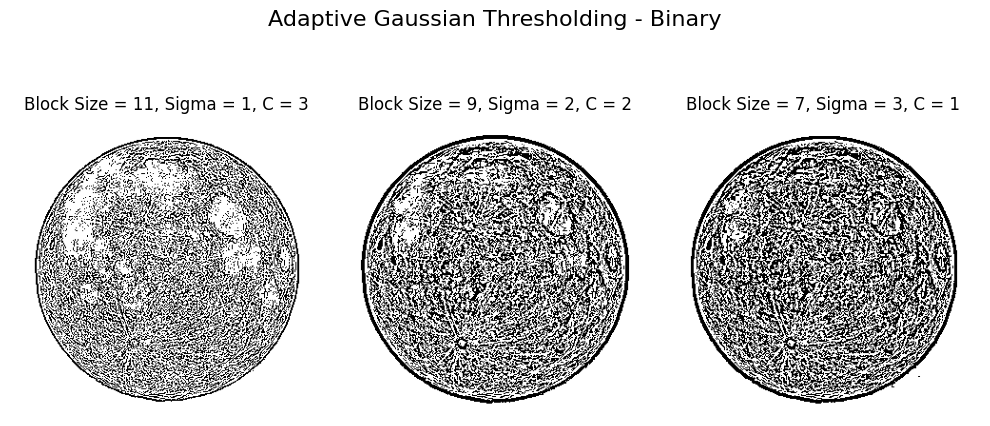

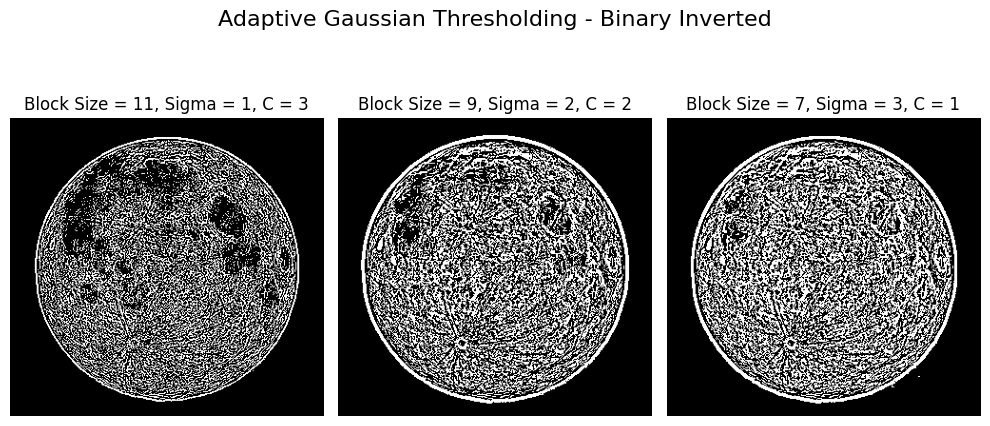

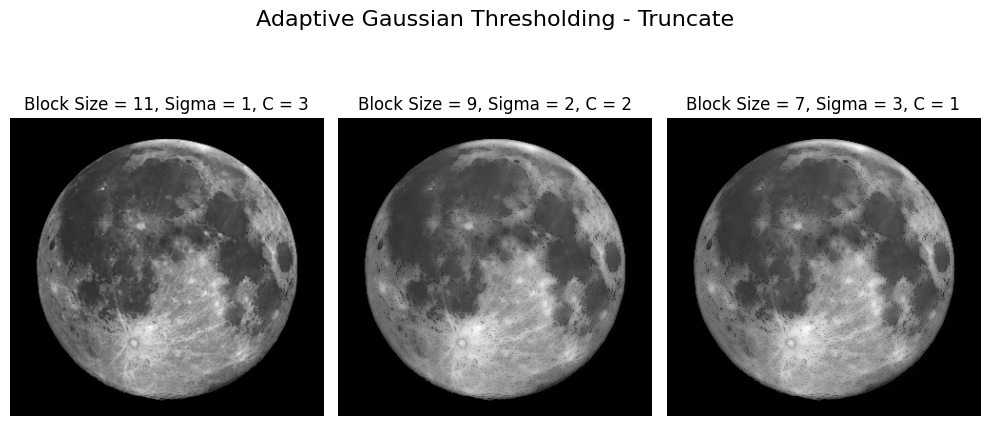

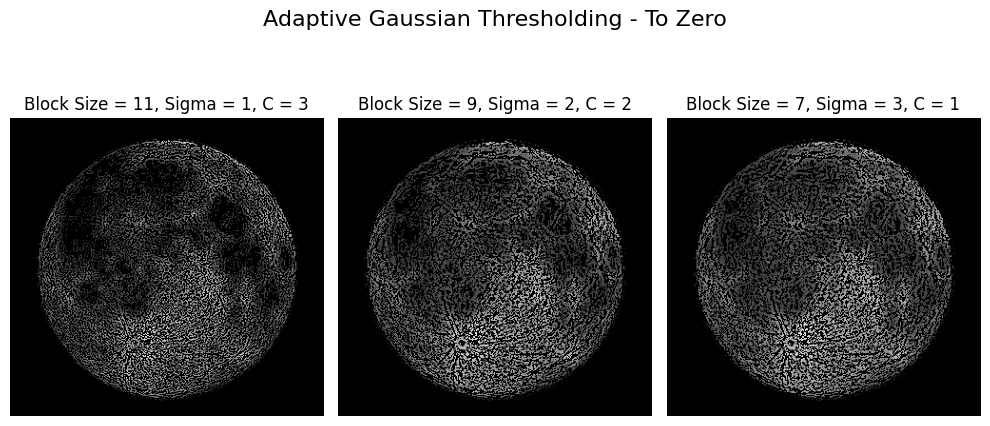

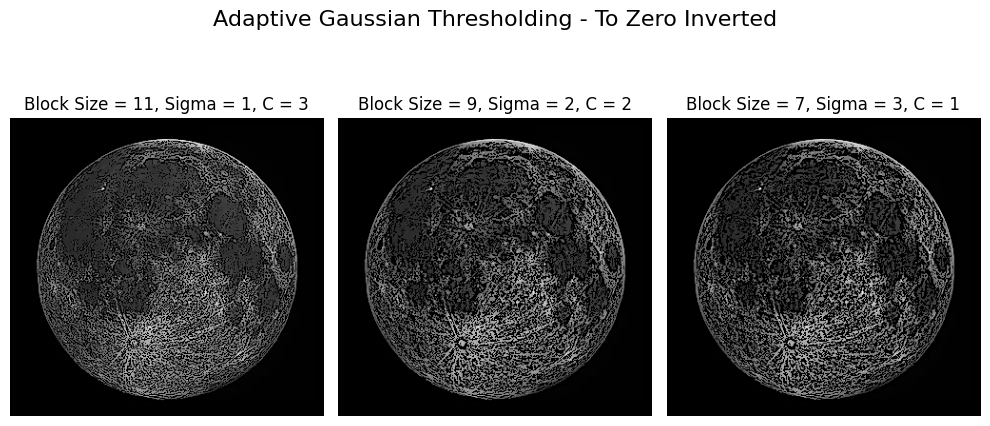

In [26]:
for i, th_mode in enumerate(thresh_modes):
    Plotter.PlotImages(
        ovr_ada_gauss_thresh_images[i],
        title=f"Adaptive Gaussian Thresholding - {th_mode.value}",
        subtitles=ada_gauss_thresh_titles,
    )

##### 2.4. Otsu's Method of Thresholding

In [27]:
otsu_thresh_params, otsu_thresh_titles = thresholding_metadata[ThresholdingType.OTSU]

ovr_otsu_thresh_images = []
for th_mode in thresh_modes:
    otsu_thresh_images = []
    for kwargs in otsu_thresh_params:
        otsu_thresh_images.append(
            OtsuThresholding(th_mode, **kwargs).ApplyThresholding(image)
        )
    ovr_otsu_thresh_images.append(otsu_thresh_images)

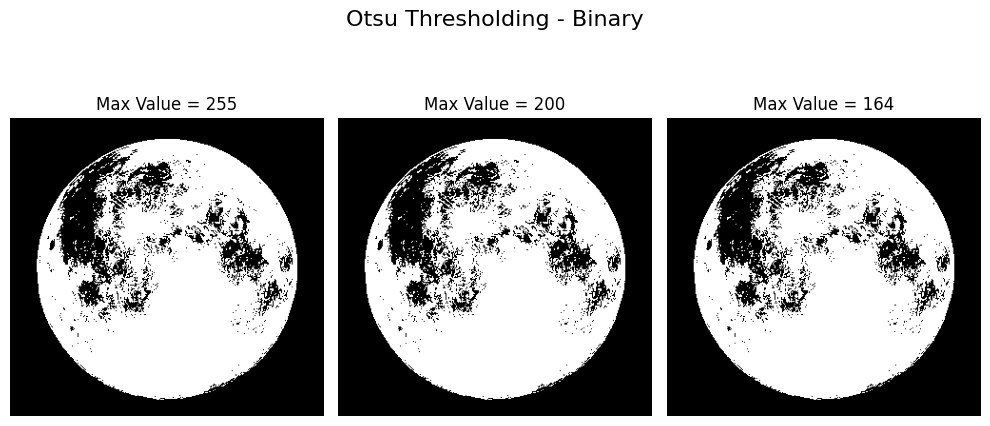

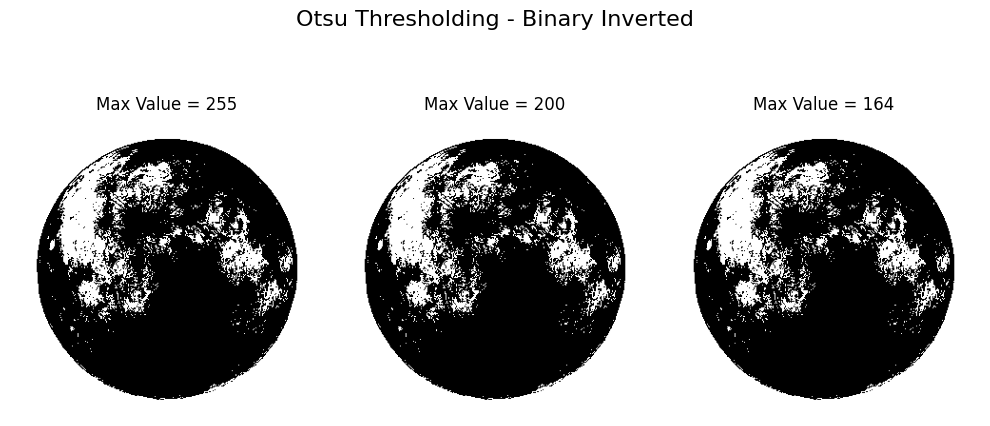

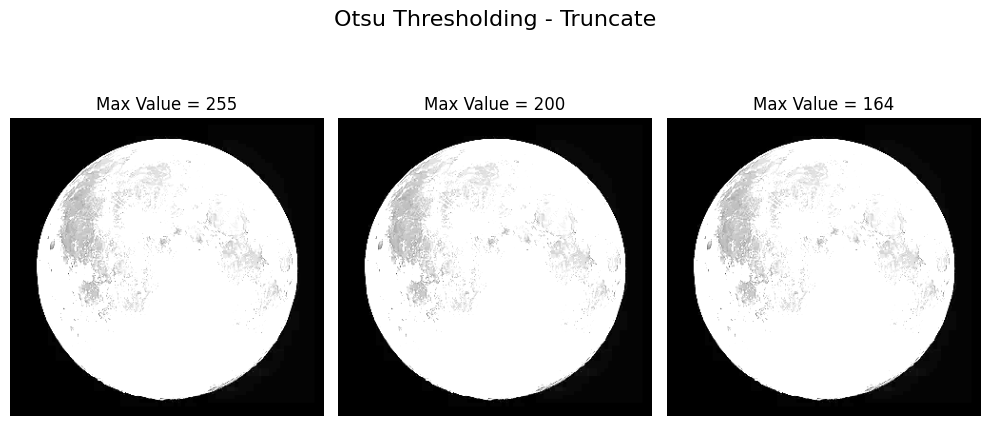

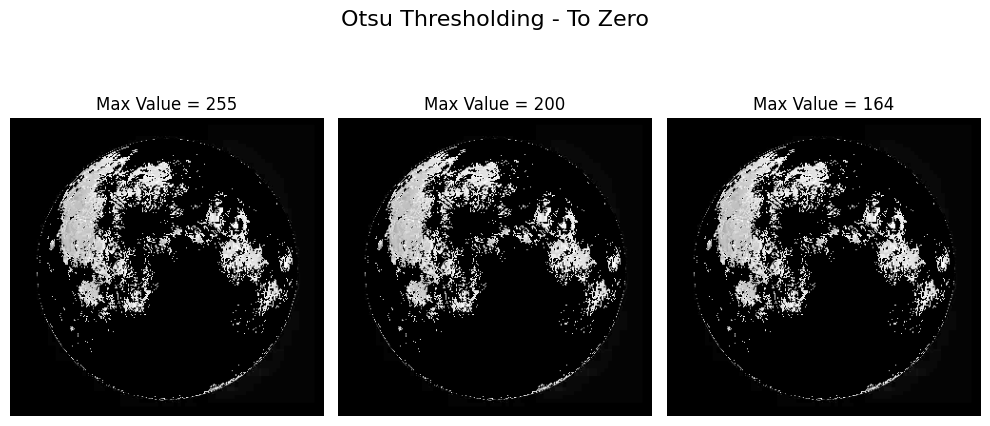

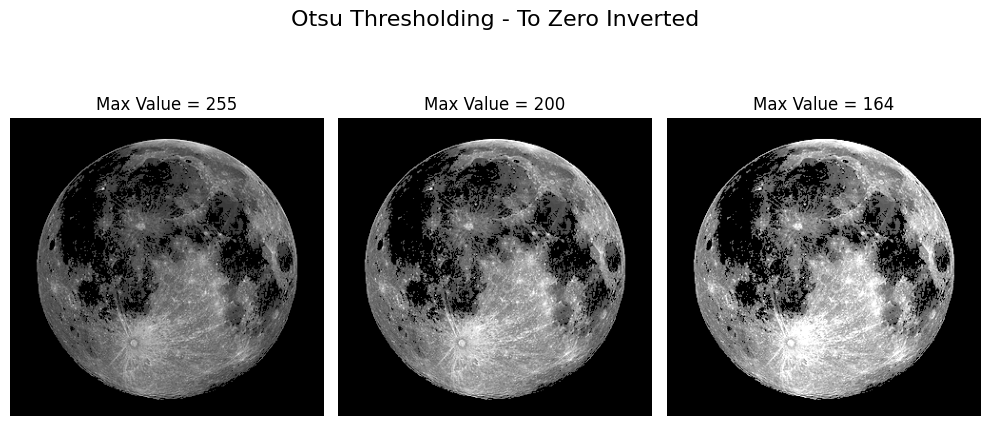

In [28]:
for i, th_mode in enumerate(thresh_modes):
    Plotter.PlotImages(
        ovr_otsu_thresh_images[i],
        title=f"Otsu Thresholding - {th_mode.value}",
        subtitles=otsu_thresh_titles,
    )

### 3. Morphological Operations

In [29]:
bin_thresh_image = ovr_global_thresh_images[0][0]

morphops_metadata = (
    [
        {
            "kernel": MorphKernelGenerator.GetSquareKernel(3)
        },
        {
            "kernel": MorphKernelGenerator.GetSquareKernel(5)
        },
        {
            "kernel": MorphKernelGenerator.GetCrossKernel(3)
        },
        {
            "kernel": MorphKernelGenerator.GetCrossKernel(5)
        }
    ],
    [
        "Square Kernel (3x3)",
        "Square Kernel (5x5)",
        "Cross Kernel (3x3)",
        "Cross Kernel (5x5)",
    ],
)

##### 3.1. Dilation

In [30]:
dilation_params, dilation_titles = morphops_metadata

dilation_images = []
for kwargs in dilation_params:
    dilation_image = Dilator(kwargs["kernel"]).Morph(bin_thresh_image)
    dilation_images.append(dilation_image)

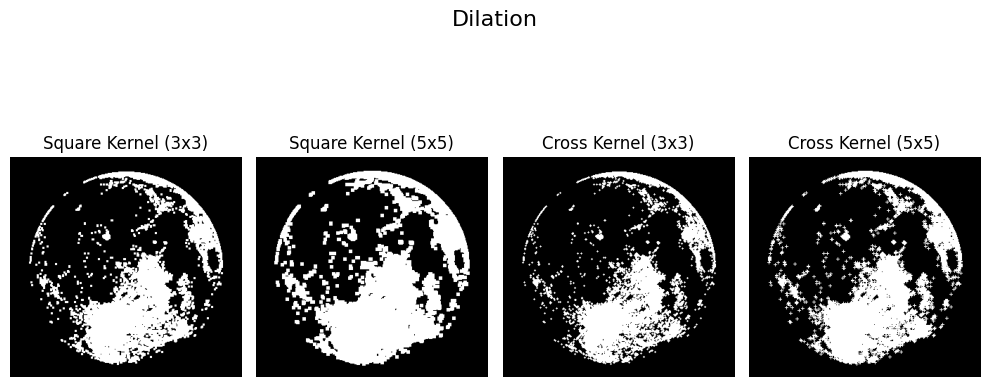

In [31]:
Plotter.PlotImages(dilation_images, title="Dilation", subtitles=dilation_titles)

##### 3.2. Erosion

In [32]:
erosion_params, erosion_titles = morphops_metadata

erosion_images = []
for kwargs in erosion_params:
    erosion_image = Eroder(kwargs["kernel"]).Morph(bin_thresh_image)
    erosion_images.append(erosion_image)

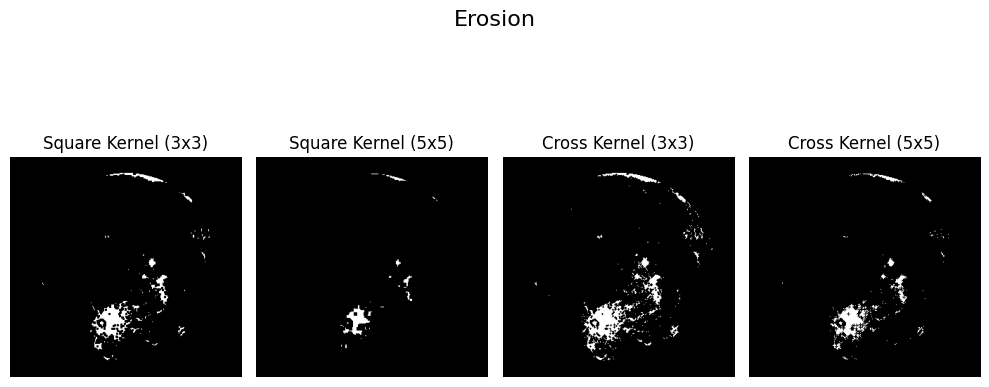

In [33]:
Plotter.PlotImages(erosion_images, title="Erosion", subtitles=erosion_titles)

##### 3.3. Opening

In [34]:
opening_params, opening_titles = morphops_metadata

opening_images = []
for kwargs in opening_params:
    opening_image = Opener(kwargs["kernel"]).Morph(bin_thresh_image)
    opening_images.append(opening_image)

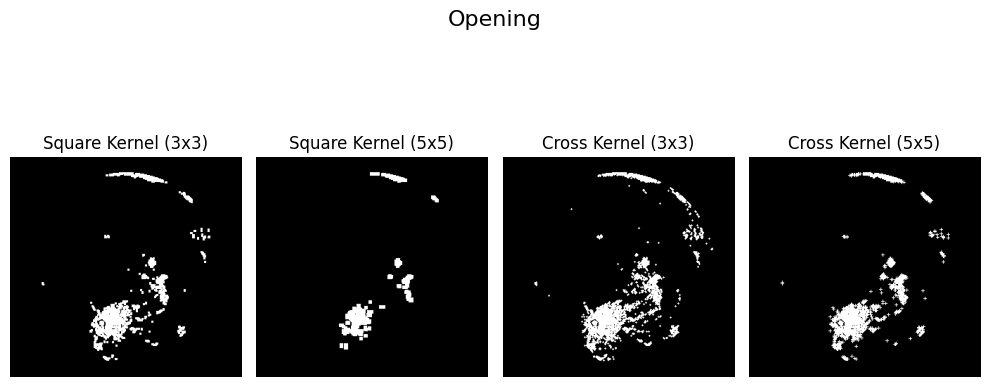

In [35]:
Plotter.PlotImages(opening_images, title="Opening", subtitles=opening_titles)

##### 3.4. Closing

In [36]:
closing_params, closing_titles = morphops_metadata

closing_images = []
for kwargs in closing_params:
    closing_image = Closer(kwargs["kernel"]).Morph(bin_thresh_image)
    closing_images.append(closing_image)

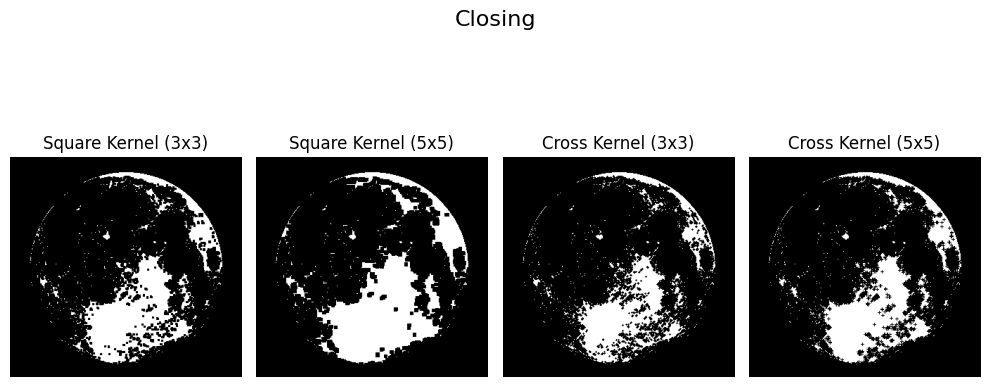

In [37]:
Plotter.PlotImages(closing_images, title="Closing", subtitles=closing_titles)